# Shared Bikes Demand Prediction Case Study

#### Problem Statement:

A US bike-sharing provider `BoomBikes` has a daily dataset on the rental bikes based on various environmental and seasonal settings. It wishes to use this data to understand the factors affecting the demand for these shared bikes in the American market and come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown due to corona pandemic comes to an end.

Essentially, the company wants to know —


- Which variables are significant in predicting the demand for shared bikes.


- How well those variables describe the bike demands

### Multiple Linear Regression

In [1]:
# Importing the required libraries.
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import xgboost
from xgboost import XGBRegressor

In [2]:
# Reading the data:
df=pd.read_csv('E:\Machine_Learning And AI\MachineLearning\Bike Sharing Case Study\Day.csv')
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
# The column instant is set as index for df:
df=df.set_index('instant',drop=True)
df

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341


In [5]:
# Since the information in dteday can be found in columns yr,mnth,weekday Hence we drop it.
# Since sum of casual and registered gives us cnt which is target variable, hence we drop it.
df=df.drop(['dteday','casual','registered'],axis=1)
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,,
1,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
2,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
3,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
4,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
5,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114
727,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095
728,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341


In [6]:
# Continuous variables:
cou_var=df.iloc[:,7:]
cou_var

,temp,atemp,hum,windspeed,cnt
instant,,,,,
1,14.110847,18.18125,80.5833,10.749882,985
2,14.902598,17.68695,69.6087,16.652113,801
3,8.050924,9.47025,43.7273,16.636703,1349
4,8.200000,10.60610,59.0435,10.739832,1562
5,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...
726,10.420847,11.33210,65.2917,23.458911,2114
727,10.386653,12.75230,59.0000,10.416557,3095
728,10.386653,12.12000,75.2917,8.333661,1341


In [7]:
# Categorical variables:
cat_var=df.iloc[:,:7]
cat_var

,season,yr,mnth,holiday,weekday,workingday,weathersit
instant,,,,,,,
1,1,0,1,0,6,0,2
2,1,0,1,0,0,0,2
3,1,0,1,0,1,1,1
4,1,0,1,0,2,1,1
5,1,0,1,0,3,1,1
...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2
727,1,1,12,0,5,1,2
728,1,1,12,0,6,0,2


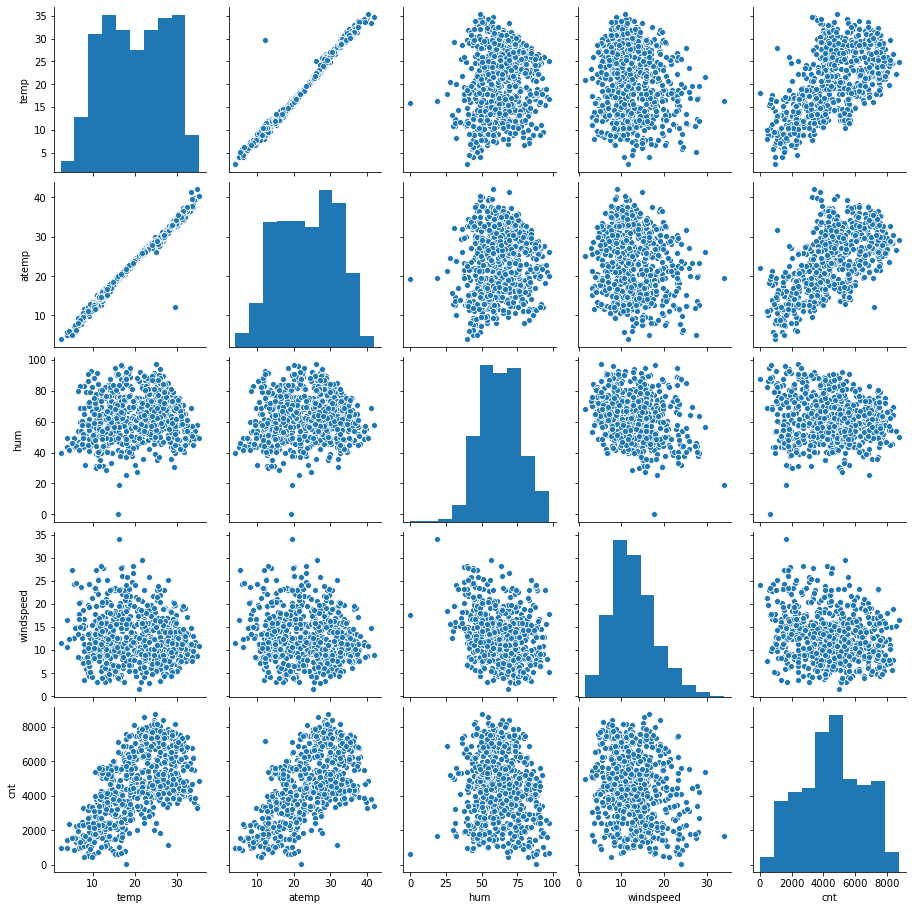

In [8]:
# Visualising continuous variables using pairplot:
sns.pairplot(cou_var)
plt.show()

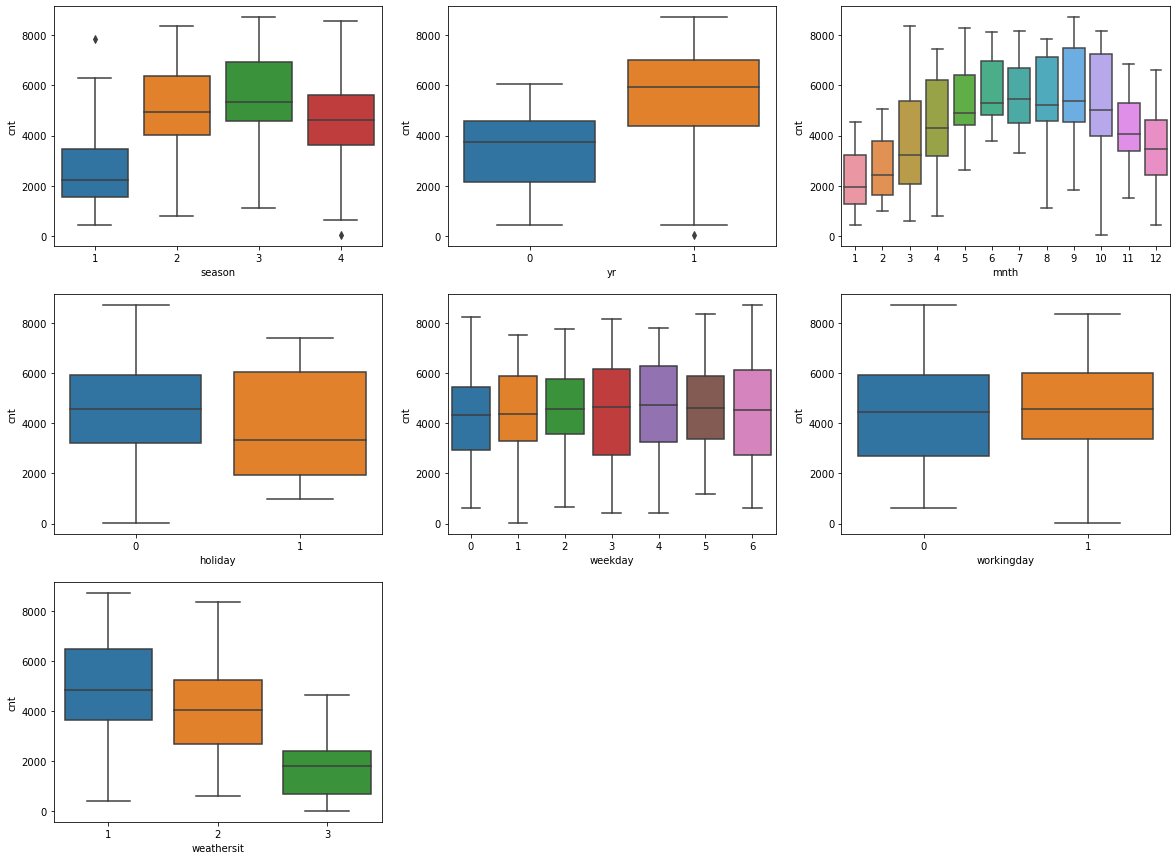

In [9]:
# Visualising Categorical variables using boxplot:
plt.figure(figsize=[20,15])
plt.subplot(3,3,1)
sns.boxplot(y='cnt',x='season',data=df)
plt.subplot(3,3,2)
sns.boxplot(y='cnt',x='yr',data=df)
plt.subplot(3,3,3)
sns.boxplot(y='cnt',x='mnth',data=df)
plt.subplot(3,3,4)
sns.boxplot(y='cnt',x='holiday',data=df)
plt.subplot(3,3,5)
sns.boxplot(y='cnt',x='weekday',data=df)
plt.subplot(3,3,6)
sns.boxplot(y='cnt',x='workingday',data=df)
plt.subplot(3,3,7)
sns.boxplot(y='cnt',x='weathersit',data=df)
plt.show()

**Since the columns season, mnth, weekday, weathersit has more than 2 levels, we need to encode these columns using dummy variables.**

In [10]:
# Creating dummy variables:
df=pd.get_dummies(data=df,columns=['season','mnth','weekday','weathersit'],drop_first=True)
df

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
instant,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,1,1,0
2,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,0,0,0
5,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,0,1,10.420847,11.33210,65.2917,23.458911,2114,0,0,...,0,1,0,0,0,1,0,0,1,0
727,1,0,1,10.386653,12.75230,59.0000,10.416557,3095,0,0,...,0,1,0,0,0,0,1,0,1,0
728,1,0,0,10.386653,12.12000,75.2917,8.333661,1341,0,0,...,0,1,0,0,0,0,0,1,1,0


In [11]:
# Splitting the df into train and test df:
df_train,df_test=train_test_split(df,train_size=0.7,random_state=100)
true_cnt=df_train['cnt']
df_train

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
instant,,,,,,,,,,,,,,,,,,,,,
577,1,0,1,29.246653,33.14480,70.4167,11.083475,7216,0,1,...,0,0,0,1,0,0,0,0,0,0
427,1,0,0,16.980847,20.67460,62.1250,10.792293,4066,0,0,...,0,0,0,0,0,0,0,1,1,0
729,1,0,0,10.489153,11.58500,48.3333,23.500518,1796,0,0,...,0,1,0,0,0,0,0,0,0,0
483,1,0,0,15.443347,18.87520,48.9583,8.708325,4220,1,0,...,0,0,0,0,0,0,0,1,1,0
112,0,0,1,13.803347,16.09770,72.9583,14.707907,1683,1,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,1,0,1,30.852500,35.35440,65.9583,8.666718,7261,0,1,...,0,0,0,0,0,1,0,0,0,0
54,0,0,1,9.091299,12.28585,42.3043,6.305571,1917,0,0,...,0,0,0,0,1,0,0,0,0,0
351,0,0,0,10.591653,12.46855,56.0833,16.292189,2739,0,0,...,0,1,0,0,0,0,0,1,1,0


In [12]:
# Scaling the continuous variables using MinMaxScaler:
scaler=MinMaxScaler()
var=['temp', 'atemp','hum', 'windspeed','cnt']
df_train[var]=scaler.fit_transform(df_train[var])
df_train

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
instant,,,,,,,,,,,,,,,,,,,,,
577,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,1,0,0,0,0,0,0
427,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,1,1,0
729,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,1,0,0,0,0,0,0,0,0
483,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,1,1,0
112,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,1,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,1,0,1,0.863973,0.824359,0.679690,0.187140,0.832835,0,1,...,0,0,0,0,0,1,0,0,0,0
54,0,0,1,0.202618,0.218747,0.435939,0.111379,0.218017,0,0,...,0,0,0,0,1,0,0,0,0,0
351,0,0,0,0.248216,0.223544,0.577930,0.431816,0.312586,0,0,...,0,1,0,0,0,0,0,1,1,0


In [13]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.247059,0.262745,...,0.086275,0.084314,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.345098,0.029412
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.431725,0.440557,...,0.281045,0.278131,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


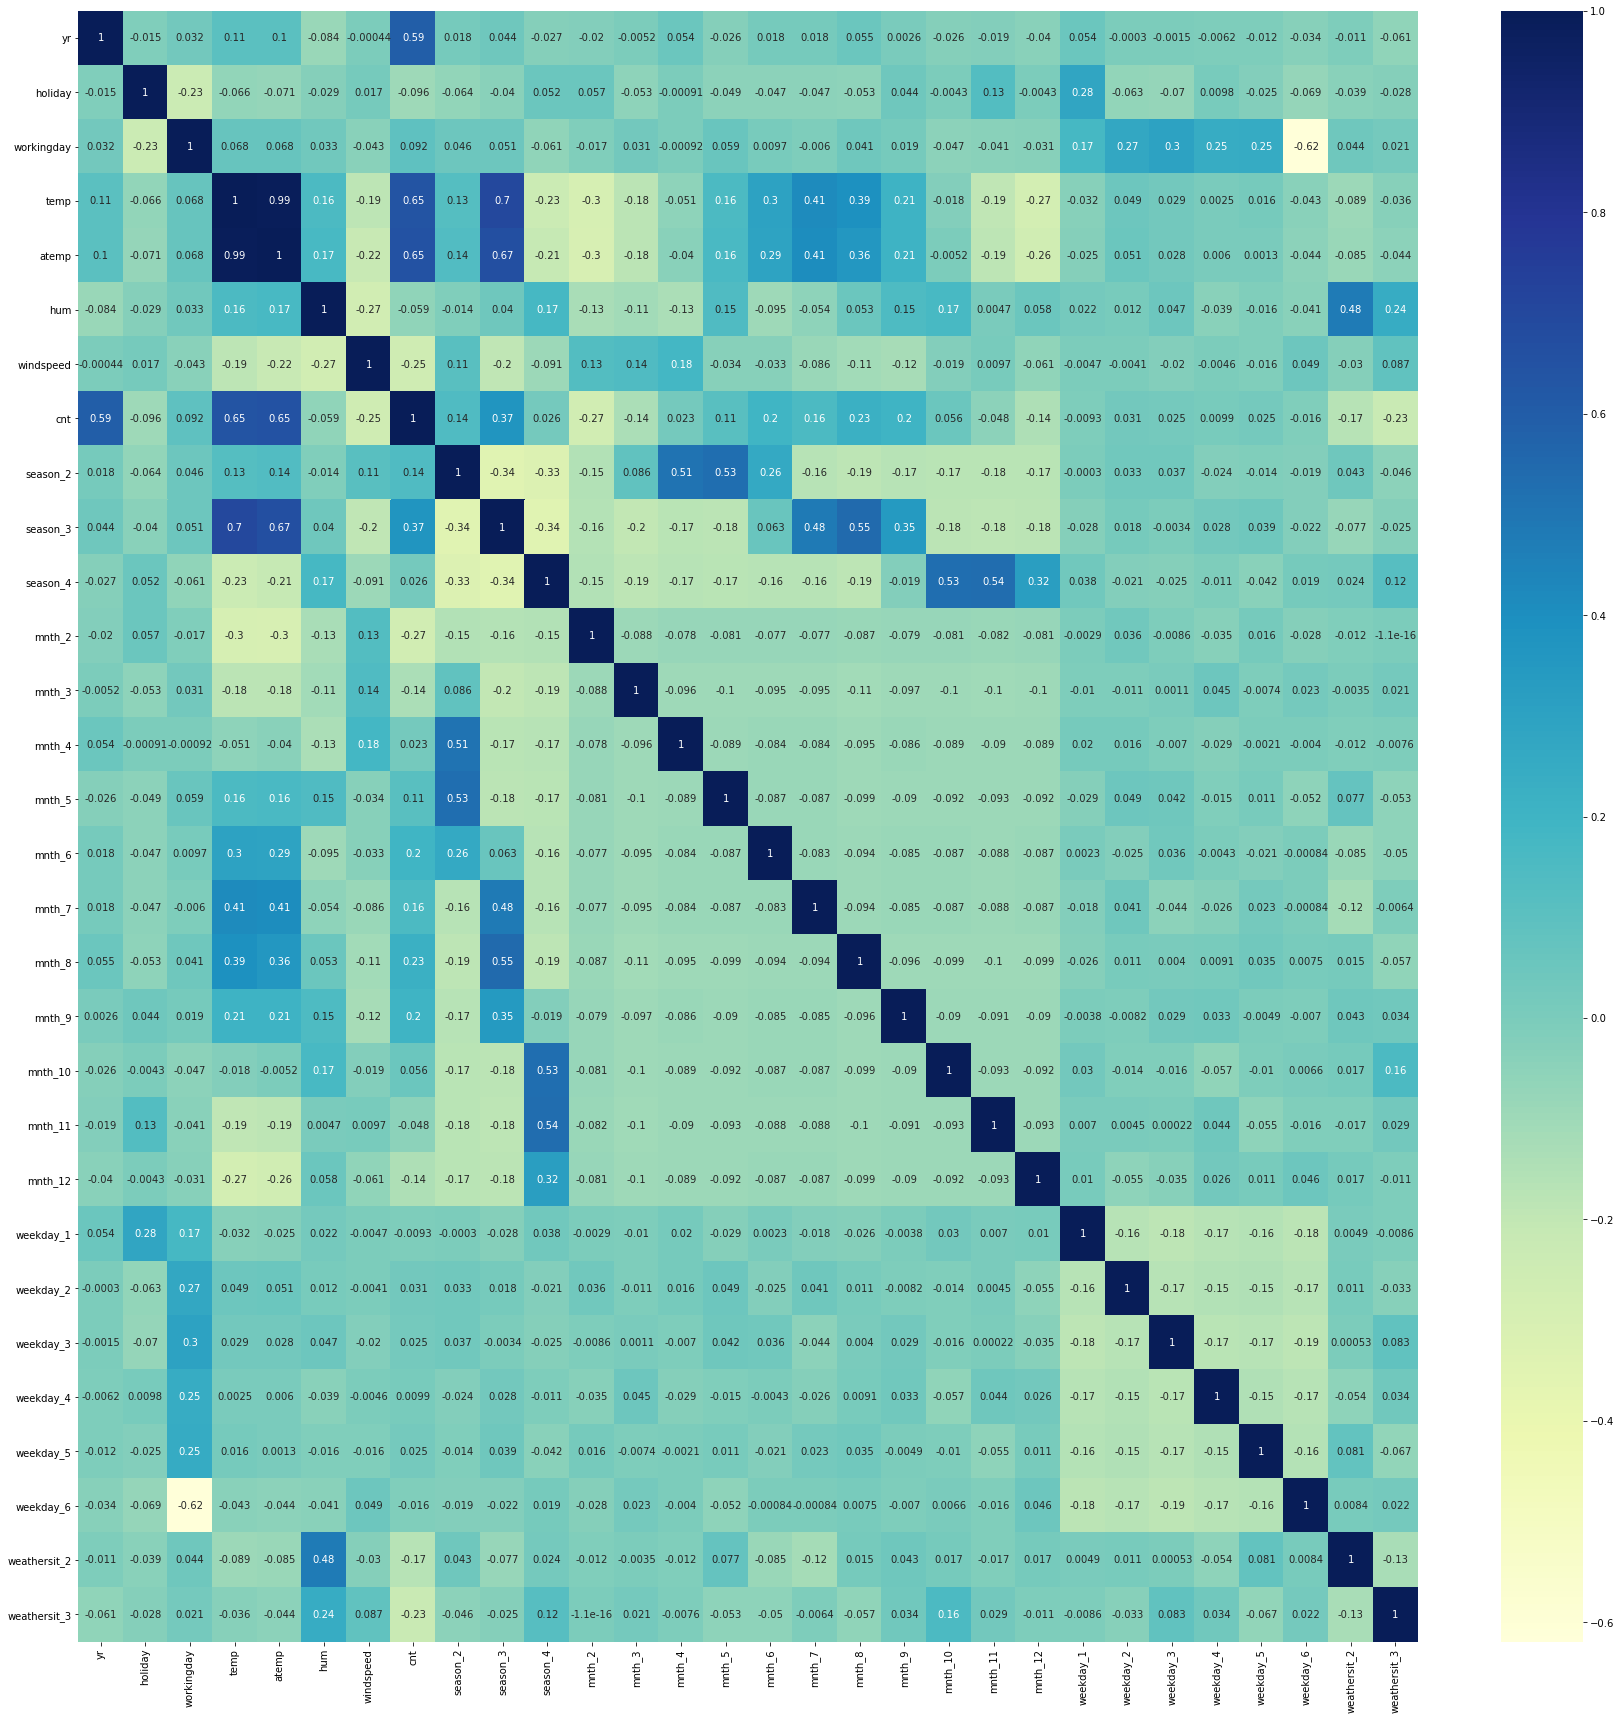

In [14]:
# Visualising correlations using heatmap:
plt.figure(figsize=[30,30])
sns.heatmap(df_train.corr(),annot=True,cmap='YlGnBu')
plt.show()

In [15]:
# Creating target variable and predictor variable from train set:
y_train=df_train.pop('cnt')
X_train=df_train

In [16]:
y_train

instant
577    0.827658
427    0.465255
729    0.204096
483    0.482973
112    0.191095
         ...   
579    0.832835
54     0.218017
351    0.312586
80     0.236424
521    0.802922
Name: cnt, Length: 510, dtype: float64

In [17]:
X_train

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
instant,,,,,,,,,,,,,,,,,,,,,
577,1,0,1,0.815169,0.766351,0.725633,0.264686,0,1,0,...,0,0,0,1,0,0,0,0,0,0
427,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,...,0,0,0,0,0,0,0,1,1,0
729,1,0,0,0.245101,0.200348,0.498067,0.663106,0,0,0,...,0,1,0,0,0,0,0,0,0,0
483,1,0,0,0.395666,0.391735,0.504508,0.188475,1,0,0,...,0,0,0,0,0,0,0,1,1,0
112,0,0,1,0.345824,0.318819,0.751824,0.380981,1,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,1,0,1,0.863973,0.824359,0.679690,0.187140,0,1,0,...,0,0,0,0,0,1,0,0,0,0
54,0,0,1,0.202618,0.218747,0.435939,0.111379,0,0,0,...,0,0,0,0,1,0,0,0,0,0
351,0,0,0,0.248216,0.223544,0.577930,0.431816,0,0,1,...,0,1,0,0,0,0,0,1,1,0


# #1 : Using RFE

**Creating Linear Regression Model using SKlearn:**

In [18]:
# Initialising Linear Regression Model:
lr=LinearRegression()

In [19]:
# Fitiing the Linear Regression Model:
lr=lr.fit(X_train,y_train)

In [20]:
# Initialising Recursive Feature Elimination to auto reduce the variables from 30 to 10:
rfe=RFE(lr,10)

In [21]:
# Fitting RFE:
rfe=rfe.fit(X_train,y_train)

In [22]:
# Checking for eleminated columns:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 11),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', False, 6),
 ('season_4', True, 1),
 ('mnth_2', False, 12),
 ('mnth_3', False, 7),
 ('mnth_4', False, 9),
 ('mnth_5', False, 8),
 ('mnth_6', False, 10),
 ('mnth_7', False, 13),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', False, 5),
 ('mnth_11', False, 14),
 ('mnth_12', False, 15),
 ('weekday_1', False, 16),
 ('weekday_2', False, 17),
 ('weekday_3', False, 19),
 ('weekday_4', False, 20),
 ('weekday_5', False, 18),
 ('weekday_6', False, 3),
 ('weathersit_2', False, 2),
 ('weathersit_3', True, 1)]

In [23]:
# Updating X_train set with the variables as suggested by RFE:
X_train_rfe=X_train[X_train.columns[rfe.support_]]
X_train_rfe

,yr,holiday,temp,hum,windspeed,season_2,season_4,mnth_8,mnth_9,weathersit_3
instant,,,,,,,,,,
577,1,0,0.815169,0.725633,0.264686,0,0,0,0,0
427,1,0,0.442393,0.640189,0.255342,0,0,0,0,0
729,1,0,0.245101,0.498067,0.663106,0,0,0,0,0
483,1,0,0.395666,0.504508,0.188475,1,0,0,0,0
112,0,0,0.345824,0.751824,0.380981,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
579,1,0,0.863973,0.679690,0.187140,0,0,1,0,0
54,0,0,0.202618,0.435939,0.111379,0,0,0,0,0
351,0,0,0.248216,0.577930,0.431816,0,1,0,0,0


In [24]:
# Adding constant:
X_train_rfe_sm=sm.add_constant(X_train_rfe)
X_train_rfe_sm

,const,yr,holiday,temp,hum,windspeed,season_2,season_4,mnth_8,mnth_9,weathersit_3
instant,,,,,,,,,,,
577,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,0,0
427,1.0,1,0,0.442393,0.640189,0.255342,0,0,0,0,0
729,1.0,1,0,0.245101,0.498067,0.663106,0,0,0,0,0
483,1.0,1,0,0.395666,0.504508,0.188475,1,0,0,0,0
112,1.0,0,0,0.345824,0.751824,0.380981,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
579,1.0,1,0,0.863973,0.679690,0.187140,0,0,1,0,0
54,1.0,0,0,0.202618,0.435939,0.111379,0,0,0,0,0
351,1.0,0,0,0.248216,0.577930,0.431816,0,1,0,0,0


**Creating Linear Regression Model using StatsModels package:**

In [25]:
# Fitting the Linear Regression Model:
lr=sm.OLS(y_train,X_train_rfe_sm).fit()

In [26]:
# Checking the summary:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.8
Date:                Mon, 16 Aug 2021   Prob (F-statistic):          1.02e-186
Time:                        02:21:07   Log-Likelihood:                 495.21
No. Observations:                 510   AIC:                            -968.4
Df Residuals:                     499   BIC:                            -921.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2755      0.026     10.547      0.000       0.224       0.327
yr               0.2264      0.008     27.262      0.000       0.210       0.243
holiday         -0.0893      0.026     -3.409      0.001      -0.141      -0.038
temp             0.5660      0.022     25.833      0.000       0.523       0.609
hum             -0.2848      0.032     -9.026      0.000      -0.347      -0.223
windspeed       -0.2012      0.026     -7.729      0.000      -0.252      -0.150
season_2         0.1011      0.011      9.084      0.000       0.079       0.123
season_4         0.1508      0.011     13.840      0.000       0.129       0.172
mnth_8           0.0496      0.017      2.973      0.003       0.017       0.082
mnth_9           0.1190      0.017      7.174      0.000       0.086       0.152
weathersit_3    -0.1916      0.026     -7.496      0.000      -0.242      -0.141
==============================================================================
Omnibus:                       56.891   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.867
Skew:                          -0.673   Prob(JB):                     1.03e-23
Kurtosis:                       4.781   Cond. No.                         15.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
# Checking the Variance Inflation Factor:
vif=pd.DataFrame()
vif['Columns']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif=vif.sort_values(by='VIF',ascending=False)
vif=vif.round(2)
vif

,Columns,VIF
3,hum,10.02
2,temp,8.52
4,windspeed,3.57
0,yr,2.01
5,season_2,1.82
6,season_4,1.73
7,mnth_8,1.57
8,mnth_9,1.30
9,weathersit_3,1.09
1,holiday,1.04


**Now the p_value for all the variables are significant but VIF for 'hum' and 'temp' is Redundant. Since 'hum' is more Redundant, we drop this first.**

In [28]:
# Dropping 'hum':
X_train_rfe=X_train_rfe.drop('hum',axis=1)
X_train_rfe_sm=sm.add_constant(X_train_rfe)

In [29]:
# Rebuilding the LR-Model:
lr=sm.OLS(y_train,X_train_rfe_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     230.3
Date:                Mon, 16 Aug 2021   Prob (F-statistic):          1.39e-171
Time:                        02:21:07   Log-Likelihood:                 456.65
No. Observations:                 510   AIC:                            -893.3
Df Residuals:                     500   BIC:                            -851.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0900      0.017      5.181      0.000       0.056       0.124
yr               0.2332      0.009     26.169      0.000       0.216       0.251
holiday         -0.0848      0.028     -3.005      0.003      -0.140      -0.029
temp             0.5464      0.023     23.262      0.000       0.500       0.593
windspeed       -0.1427      0.027     -5.252      0.000      -0.196      -0.089
season_2         0.0905      0.012      7.588      0.000       0.067       0.114
season_4         0.1316      0.012     11.430      0.000       0.109       0.154
mnth_8           0.0394      0.018      2.196      0.029       0.004       0.075
mnth_9           0.1002      0.018      5.650      0.000       0.065       0.135
weathersit_3    -0.2520      0.027     -9.483      0.000      -0.304      -0.200
==============================================================================
Omnibus:                       63.117   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.174
Skew:                          -0.757   Prob(JB):                     7.23e-25
Kurtosis:                       4.714   Cond. No.                         9.93
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
# Checking the Variance Inflation Factor:
vif=pd.DataFrame()
vif['Columns']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif=vif.sort_values(by='VIF',ascending=False)
vif=vif.round(2)
vif

,Columns,VIF
2,temp,4.99
3,windspeed,3.01
0,yr,2.00
4,season_2,1.79
6,mnth_8,1.57
5,season_4,1.44
7,mnth_9,1.29
8,weathersit_3,1.06
1,holiday,1.04


**Now since the p_value for all the variables are significant and VIF for all the variables is < 5, the Linear Regression Model is finalised.**

## **Residual Analysis**

In [31]:
# Getting predicted values for train data set:
y_train_pred=lr.predict(X_train_rfe_sm)
y_train_pred

instant
577    0.730928
427    0.528563
729    0.362565
483    0.603093
112    0.315153
         ...   
579    0.808015
54     0.184853
351    0.295653
80     0.357749
521    0.690450
Length: 510, dtype: float64

In [32]:
# Residual:
res=y_train-y_train_pred

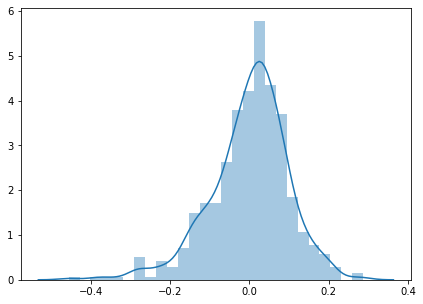

In [33]:
# Plotting distribution plot for residual:
plt.figure(figsize=[7,5])
sns.distplot(res)
plt.show()

**As we can see the curve looks like Normal distribution with mean 0. Hence our model is inline with the assumption that the error is normally distributed with zero mean.**

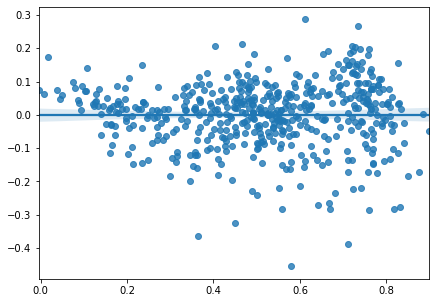

In [34]:
# Checking for patterns in residual:
plt.figure(figsize=[7,5])
sns.regplot(y_train_pred,res)
plt.show()

**Since we cannot see any patterns in error, our LR model is in line with the assumption that errors are independent of each other.**

Hence our model holds good for the following assumptions of simple linear regression:

1. Linear relationship between X and Y
2. Error terms are normally distributed
3. Error terms are independent of each other
4. Error terms have constant variance (homoscedasticity)

## Model Evaluation

**Now we validate our model using test df**

In [35]:
df_test[var]

,temp,atemp,hum,windspeed,cnt
instant,,,,,
185,29.793347,33.27085,63.7917,5.459106,6043
536,32.082500,36.04875,59.2083,7.625404,6211
300,19.270000,22.85230,81.2917,13.250121,2659
222,31.433347,34.24915,42.4167,13.417286,4780
153,29.315000,32.19710,30.5000,19.583229,4968
...,...,...,...,...,...
703,19.509153,23.45270,73.3750,11.666643,6606
128,21.661653,25.94665,63.1667,5.000712,4333
641,26.957500,29.95665,79.3750,4.458569,7572


In [36]:
true_cnt_test=df_test['cnt']

In [37]:
# Transforming the test data:
df_test[var]=scaler.transform(df_test[var])
df_test

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
instant,,,,,,,,,,,,,,,,,,,,,
185,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,...,0,0,1,0,0,0,0,0,1,0
536,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,1,0,...,0,0,0,0,1,0,0,0,0,0
300,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,0,0,0,1,0,0,1,0
222,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,...,0,0,0,0,1,0,0,0,0,0
153,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,1,0,1,0.519232,0.511907,0.756118,0.283397,0.757478,0,0,...,0,1,0,1,0,0,0,0,0,0
128,0,0,0,0.584649,0.577380,0.650923,0.069510,0.495973,1,0,...,0,0,0,0,0,0,0,0,0,0
641,1,0,1,0.745598,0.682653,0.817947,0.052115,0.868615,0,0,...,0,0,0,0,1,0,0,0,1,0


In [38]:
df_test[var].describe()

,temp,atemp,hum,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.558718,0.532847,0.638221,0.313293,0.522154
std,0.233187,0.217401,0.148694,0.159584,0.219163
min,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.355429,0.344870,0.529197,0.198843,0.378595
50%,0.558172,0.544652,0.625590,0.300126,0.524678
75%,0.755981,0.713308,0.743798,0.402718,0.677750
max,0.984424,0.980934,1.002146,0.807474,0.963300


In [39]:
y_test=df_test.pop('cnt')
X_test=df_test

In [40]:
# Filtering the columns required for the model input:
X_test=df_test[X_train_rfe.columns]
X_test

,yr,holiday,temp,windspeed,season_2,season_4,mnth_8,mnth_9,weathersit_3
instant,,,,,,,,,
185,0,1,0.831783,0.084219,0,0,0,0,0
536,1,0,0.901354,0.153728,1,0,0,0,0
300,0,0,0.511964,0.334206,0,1,0,0,0
222,0,0,0.881625,0.339570,0,0,1,0,0
153,0,0,0.817246,0.537414,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
703,1,0,0.519232,0.283397,0,1,0,0,0
128,0,0,0.584649,0.069510,1,0,0,0,0
641,1,0,0.745598,0.052115,0,1,0,0,0


In [41]:
# Adding constant:
X_test_sm=sm.add_constant(X_test)
X_test_sm

,const,yr,holiday,temp,windspeed,season_2,season_4,mnth_8,mnth_9,weathersit_3
instant,,,,,,,,,,
185,1.0,0,1,0.831783,0.084219,0,0,0,0,0
536,1.0,1,0,0.901354,0.153728,1,0,0,0,0
300,1.0,0,0,0.511964,0.334206,0,1,0,0,0
222,1.0,0,0,0.881625,0.339570,0,0,1,0,0
153,1.0,0,0,0.817246,0.537414,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
703,1.0,1,0,0.519232,0.283397,0,1,0,0,0
128,1.0,0,0,0.584649,0.069510,1,0,0,0,0
641,1.0,1,0,0.745598,0.052115,0,1,0,0,0


In [42]:
# Predicting the results for test set:
y_test_pred=lr.predict(X_test_sm)
y_test_pred

instant
185    0.447702
536    0.884377
300    0.453704
222    0.562675
153    0.550430
         ...   
703    0.698159
128    0.490104
641    0.854859
73     0.242175
654    0.690570
Length: 220, dtype: float64

### Results 

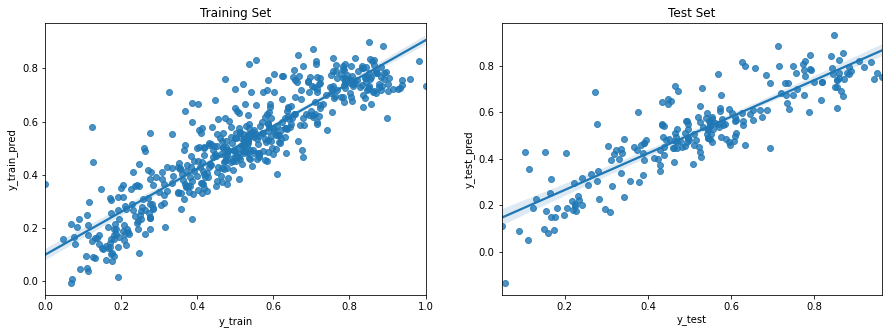

In [43]:
# Plotting regression plot for train and test set:
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.regplot(y_train,y_train_pred)
plt.xlabel('y_train')
plt.ylabel('y_train_pred')
plt.title('Training Set')
plt.subplot(1,2,2)
sns.regplot(y_test,y_test_pred)
plt.title('Test Set')
plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.show()

In [44]:
# Comparing the Rsquare:
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred)) 

0.8056780165818269
0.7731388699761519


**Thus, for the model with 9 variables, the r-squared on training and test data is about 80.56% and 77.3% respectively.**

**The adjusted r-squared on the train set is about is about 80.2%.**

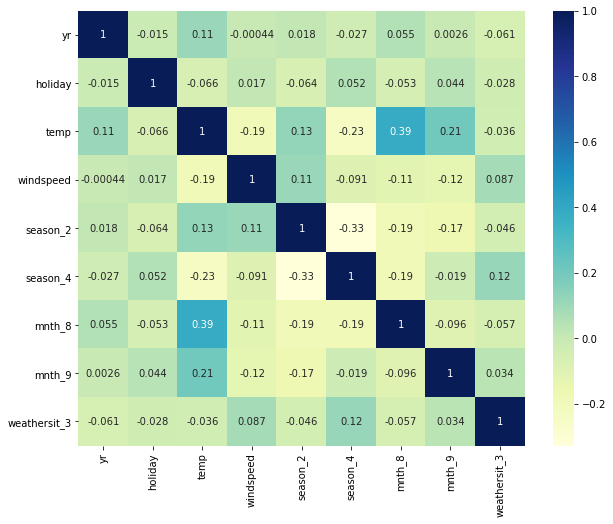

In [45]:
# Plotting correlation using heatmap:
plt.figure(figsize=[10,8])
sns.heatmap(X_train_rfe.corr(),annot=True,cmap='YlGnBu')
plt.show()

**This is the simplest model that we could build. The final predictors seem to have fairly low correlations.**

**Thus, the final model consists of the 9 variables mentioned above. One can go ahead with this model and use it for predicting count of daily bike rentals.**

# #2 : Using GridSearchCV

In [46]:
# Hyperparameter Tuning Using Grid Search Cross-Validation
folds=KFold(n_splits=5,shuffle=True,random_state=100)
hyper_params=[{'n_features_to_select':list(range(1,29))}]

lr=LinearRegression()
lr.fit(X_train,y_train)
rfe=RFE(lr)
model_cv=GridSearchCV(estimator=rfe,param_grid=hyper_params,scoring='r2',verbose=1,return_train_score=True,cv=folds)
model_cv.fit(X_train,y_train)

cv_results=pd.DataFrame(model_cv.cv_results_)
cv_results

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.1s finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.027627,0.002554,0.002394,4.883830e-04,1,{'n_features_to_select': 1},0.412475,0.450110,0.362765,0.352022,...,0.396345,0.035516,28,0.416538,0.394276,0.424259,0.426777,0.418715,0.416113,0.011523
1,0.026331,0.002328,0.002593,4.883057e-04,2,{'n_features_to_select': 2},0.641744,0.456144,0.604486,0.362054,...,0.500852,0.105430,27,0.701476,0.445246,0.713422,0.456057,0.442085,0.551657,0.127344
2,0.026529,0.002054,0.002194,3.983260e-04,3,{'n_features_to_select': 3},0.659744,0.732599,0.623271,0.387294,...,0.571067,0.130023,26,0.733775,0.712077,0.722848,0.489916,0.479062,0.627536,0.117048
3,0.023839,0.001280,0.002194,3.992082e-04,4,{'n_features_to_select': 4},0.662644,0.759658,0.675730,0.750212,...,0.717427,0.040147,25,0.753743,0.727391,0.747730,0.729163,0.733072,0.738220,0.010557
4,0.022441,0.001729,0.002593,4.889671e-04,5,{'n_features_to_select': 5},0.685505,0.774644,0.719065,0.755018,...,0.736432,0.031090,24,0.762740,0.738311,0.754347,0.747505,0.750639,0.750708,0.008025
5,0.022144,0.001745,0.002194,3.989936e-04,6,{'n_features_to_select': 6},0.720822,0.789442,0.771671,0.783207,...,0.776570,0.031729,23,0.806425,0.787916,0.794204,0.793195,0.786073,0.793563,0.007127
6,0.024036,0.002283,0.002593,4.885193e-04,7,{'n_features_to_select': 7},0.713136,0.790189,0.784247,0.785437,...,0.779541,0.036383,22,0.812515,0.792776,0.800584,0.797657,0.793870,0.799480,0.007083
7,0.023138,0.002778,0.002593,7.979751e-04,8,{'n_features_to_select': 8},0.731224,0.797099,0.797845,0.780199,...,0.789114,0.034870,21,0.818716,0.801556,0.830169,0.809011,0.822088,0.816308,0.010022
8,0.022540,0.001017,0.002593,7.977725e-04,9,{'n_features_to_select': 9},0.770200,0.823950,0.797354,0.821953,...,0.811198,0.025031,19,0.840600,0.826582,0.830226,0.829593,0.826399,0.830680,0.005195
9,0.022539,0.001955,0.002593,4.888114e-04,10,{'n_features_to_select': 10},0.759729,0.828635,0.789490,0.819997,...,0.808278,0.030018,20,0.843294,0.829193,0.836369,0.839215,0.829786,0.835571,0.005435


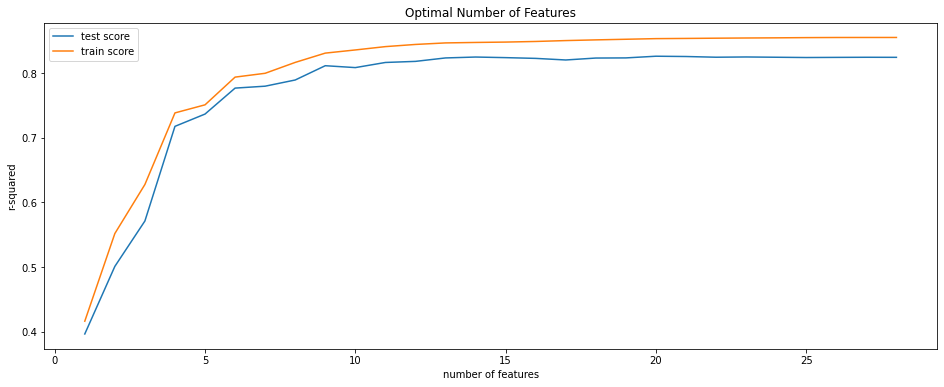

In [47]:
# plotting cv results
plt.figure(figsize=(16,6))
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')
plt.show()

In [48]:
model_cv.best_params_

{'n_features_to_select': 20}

In [49]:
model_cv.best_score_

0.8258725980545021

In [50]:
# Initialising Recursive Feature Elimination to auto reduce the variables from 29 to 20`:
rfe=RFE(lr,20)

In [51]:
# Fitting RFE:
rfe=rfe.fit(X_train,y_train)

In [52]:
# Checking for eleminated columns:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 2),
 ('mnth_3', True, 1),
 ('mnth_4', True, 1),
 ('mnth_5', True, 1),
 ('mnth_6', True, 1),
 ('mnth_7', False, 3),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 4),
 ('mnth_12', False, 5),
 ('weekday_1', False, 6),
 ('weekday_2', False, 7),
 ('weekday_3', False, 9),
 ('weekday_4', False, 10),
 ('weekday_5', False, 8),
 ('weekday_6', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [53]:
# Updating X_train set with the variables as suggested by RFE:
X_train_rfe=X_train[X_train.columns[rfe.support_]]
X_train_rfe

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,mnth_3,mnth_4,mnth_5,mnth_6,mnth_8,mnth_9,mnth_10,weekday_6,weathersit_2,weathersit_3
instant,,,,,,,,,,,,,,,,,,,,
577,1,0,1,0.815169,0.766351,0.725633,0.264686,0,1,0,0,0,0,0,0,0,0,0,0,0
427,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,1,0,0,0,0,0,0,1,1,0
729,1,0,0,0.245101,0.200348,0.498067,0.663106,0,0,0,0,0,0,0,0,0,0,0,0,0
483,1,0,0,0.395666,0.391735,0.504508,0.188475,1,0,0,0,1,0,0,0,0,0,1,1,0
112,0,0,1,0.345824,0.318819,0.751824,0.380981,1,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,1,0,1,0.863973,0.824359,0.679690,0.187140,0,1,0,0,0,0,0,1,0,0,0,0,0
54,0,0,1,0.202618,0.218747,0.435939,0.111379,0,0,0,0,0,0,0,0,0,0,0,0,0
351,0,0,0,0.248216,0.223544,0.577930,0.431816,0,0,1,0,0,0,0,0,0,0,1,1,0


In [54]:
# Adding constant:
X_train_rfe_sm=sm.add_constant(X_train_rfe)
X_train_rfe_sm

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,...,mnth_3,mnth_4,mnth_5,mnth_6,mnth_8,mnth_9,mnth_10,weekday_6,weathersit_2,weathersit_3
instant,,,,,,,,,,,,,,,,,,,,,
577,1.0,1,0,1,0.815169,0.766351,0.725633,0.264686,0,1,...,0,0,0,0,0,0,0,0,0,0
427,1.0,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,...,1,0,0,0,0,0,0,1,1,0
729,1.0,1,0,0,0.245101,0.200348,0.498067,0.663106,0,0,...,0,0,0,0,0,0,0,0,0,0
483,1.0,1,0,0,0.395666,0.391735,0.504508,0.188475,1,0,...,0,1,0,0,0,0,0,1,1,0
112,1.0,0,0,1,0.345824,0.318819,0.751824,0.380981,1,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,1.0,1,0,1,0.863973,0.824359,0.679690,0.187140,0,1,...,0,0,0,0,1,0,0,0,0,0
54,1.0,0,0,1,0.202618,0.218747,0.435939,0.111379,0,0,...,0,0,0,0,0,0,0,0,0,0
351,1.0,0,0,0,0.248216,0.223544,0.577930,0.431816,0,0,...,0,0,0,0,0,0,0,1,1,0


In [55]:
# Fitting the Linear Regression Model:
lr=sm.OLS(y_train,X_train_rfe_sm).fit()

In [56]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     139.7
Date:                Mon, 16 Aug 2021   Prob (F-statistic):          1.53e-187
Time:                        02:21:13   Log-Likelihood:                 524.48
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     489   BIC:                            -918.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1908      0.029      6.552      0.000       0.134       0.248
yr               0.2312      0.008     28.903      0.000       0.216       0.247
holiday         -0.0487      0.027     -1.814      0.070      -0.102       0.004
workingday       0.0435      0.011      3.785      0.000       0.021       0.066
temp             0.4264      0.136      3.132      0.002       0.159       0.694
atemp            0.0392      0.137      0.287      0.774      -0.229       0.308
hum             -0.1602      0.038     -4.239      0.000      -0.234      -0.086
windspeed       -0.1819      0.026     -6.988      0.000      -0.233      -0.131
season_2         0.0895      0.022      4.155      0.000       0.047       0.132
season_3         0.0487      0.023      2.115      0.035       0.003       0.094
season_4         0.1572      0.014     11.077      0.000       0.129       0.185
mnth_3           0.0461      0.017      2.749      0.006       0.013       0.079
mnth_4           0.0413      0.026      1.615      0.107      -0.009       0.092
mnth_5           0.0655      0.026      2.513      0.012       0.014       0.117
mnth_6           0.0421      0.022      1.874      0.061      -0.002       0.086
mnth_8           0.0575      0.018      3.182      0.002       0.022       0.093
mnth_9           0.1243      0.017      7.148      0.000       0.090       0.158
mnth_10          0.0463      0.017      2.656      0.008       0.012       0.081
weekday_6        0.0531      0.014      3.670      0.000       0.025       0.082
weathersit_2    -0.0583      0.010     -5.645      0.000      -0.079      -0.038
weathersit_3    -0.2516      0.026     -9.604      0.000      -0.303      -0.200
==============================================================================
Omnibus:                       81.563   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.010
Skew:                          -0.777   Prob(JB):                     5.07e-50
Kurtosis:                       5.876   Cond. No.                         88.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
# Checking the Variance Inflation Factor:
vif=pd.DataFrame()
vif['Columns']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif=vif.sort_values(by='VIF',ascending=False)
vif=vif.round(2)
vif

,Columns,VIF
3,temp,411.31
4,atemp,375.93
5,hum,18.24
8,season_3,9.10
7,season_2,7.47
2,workingday,5.10
6,windspeed,4.33
12,mnth_5,3.74
11,mnth_4,3.34
9,season_4,3.22


In [58]:
# Dropping 'atemp':
X_train_rfe=X_train_rfe.drop('atemp',axis=1)
X_train_rfe_sm=sm.add_constant(X_train_rfe)

In [59]:
# Rebuilding the LR-Model:
lr=sm.OLS(y_train,X_train_rfe_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     147.3
Date:                Mon, 16 Aug 2021   Prob (F-statistic):          1.29e-188
Time:                        02:21:13   Log-Likelihood:                 524.44
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     490   BIC:                            -924.2
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1911      0.029      6.575      0.000       0.134       0.248
yr               0.2312      0.008     28.931      0.000       0.215       0.247
holiday         -0.0491      0.027     -1.830      0.068      -0.102       0.004
workingday       0.0435      0.011      3.787      0.000       0.021       0.066
temp             0.4640      0.037     12.633      0.000       0.392       0.536
hum             -0.1596      0.038     -4.234      0.000      -0.234      -0.086
windspeed       -0.1834      0.025     -7.210      0.000      -0.233      -0.133
season_2         0.0895      0.022      4.157      0.000       0.047       0.132
season_3         0.0481      0.023      2.100      0.036       0.003       0.093
season_4         0.1574      0.014     11.107      0.000       0.130       0.185
mnth_3           0.0462      0.017      2.757      0.006       0.013       0.079
mnth_4           0.0417      0.026      1.634      0.103      -0.008       0.092
mnth_5           0.0653      0.026      2.510      0.012       0.014       0.116
mnth_6           0.0417      0.022      1.863      0.063      -0.002       0.086
mnth_8           0.0569      0.018      3.174      0.002       0.022       0.092
mnth_9           0.1243      0.017      7.153      0.000       0.090       0.158
mnth_10          0.0464      0.017      2.659      0.008       0.012       0.081
weekday_6        0.0531      0.014      3.673      0.000       0.025       0.081
weathersit_2    -0.0584      0.010     -5.658      0.000      -0.079      -0.038
weathersit_3    -0.2522      0.026     -9.664      0.000      -0.303      -0.201
==============================================================================
Omnibus:                       81.126   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.386
Skew:                          -0.773   Prob(JB):                     1.14e-49
Kurtosis:                       5.866   Cond. No.                         22.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
# Checking the Variance Inflation Factor:
vif=pd.DataFrame()
vif['Columns']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif=vif.sort_values(by='VIF',ascending=False)
vif=vif.round(2)
vif

,Columns,VIF
3,temp,29.25
4,hum,17.98
7,season_3,9.03
6,season_2,7.47
2,workingday,5.10
5,windspeed,4.13
11,mnth_5,3.74
10,mnth_4,3.33
8,season_4,3.22
12,mnth_6,2.51


In [61]:
# Dropping 'mnth_4':
X_train_rfe=X_train_rfe.drop('mnth_4',axis=1)
X_train_rfe_sm=sm.add_constant(X_train_rfe)

# Rebuilding the LR-Model:
lr=sm.OLS(y_train,X_train_rfe_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     154.9
Date:                Mon, 16 Aug 2021   Prob (F-statistic):          3.84e-189
Time:                        02:21:13   Log-Likelihood:                 523.05
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     491   BIC:                            -927.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1948      0.029      6.713      0.000       0.138       0.252
yr               0.2315      0.008     28.924      0.000       0.216       0.247
holiday         -0.0500      0.027     -1.863      0.063      -0.103       0.003
workingday       0.0433      0.011      3.770      0.000       0.021       0.066
temp             0.4690      0.037     12.791      0.000       0.397       0.541
hum             -0.1649      0.038     -4.381      0.000      -0.239      -0.091
windspeed       -0.1801      0.025     -7.091      0.000      -0.230      -0.130
season_2         0.1141      0.015      7.417      0.000       0.084       0.144
season_3         0.0476      0.023      2.074      0.039       0.003       0.093
season_4         0.1545      0.014     10.971      0.000       0.127       0.182
mnth_3           0.0334      0.015      2.250      0.025       0.004       0.062
mnth_5           0.0364      0.019      1.906      0.057      -0.001       0.074
mnth_6           0.0207      0.018      1.126      0.261      -0.015       0.057
mnth_8           0.0523      0.018      2.948      0.003       0.017       0.087
mnth_9           0.1210      0.017      7.000      0.000       0.087       0.155
mnth_10          0.0455      0.017      2.609      0.009       0.011       0.080
weekday_6        0.0525      0.014      3.628      0.000       0.024       0.081
weathersit_2    -0.0582      0.010     -5.628      0.000      -0.078      -0.038
weathersit_3    -0.2516      0.026     -9.626      0.000      -0.303      -0.200
==============================================================================
Omnibus:                       82.736   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.805
Skew:                          -0.790   Prob(JB):                     2.07e-50
Kurtosis:                       5.876   Cond. No.                         21.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
# Checking the Variance Inflation Factor:
vif=pd.DataFrame()
vif['Columns']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif=vif.sort_values(by='VIF',ascending=False)
vif=vif.round(2)
vif

,Columns,VIF
3,temp,28.98
4,hum,17.95
7,season_3,9.02
2,workingday,5.10
5,windspeed,4.05
6,season_2,3.81
8,season_4,3.17
16,weathersit_2,2.16
0,yr,2.06
10,mnth_5,1.99


In [63]:
# Dropping 'mnth_6':
X_train_rfe=X_train_rfe.drop('mnth_6',axis=1)
X_train_rfe_sm=sm.add_constant(X_train_rfe)

# Rebuilding the LR-Model:
lr=sm.OLS(y_train,X_train_rfe_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     163.8
Date:                Mon, 16 Aug 2021   Prob (F-statistic):          5.55e-190
Time:                        02:21:13   Log-Likelihood:                 522.40
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     492   BIC:                            -932.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1944      0.029      6.697      0.000       0.137       0.251
yr               0.2309      0.008     28.903      0.000       0.215       0.247
holiday         -0.0513      0.027     -1.912      0.057      -0.104       0.001
workingday       0.0433      0.012      3.766      0.000       0.021       0.066
temp             0.4845      0.034     14.251      0.000       0.418       0.551
hum             -0.1685      0.038     -4.492      0.000      -0.242      -0.095
windspeed       -0.1825      0.025     -7.210      0.000      -0.232      -0.133
season_2         0.1163      0.015      7.615      0.000       0.086       0.146
season_3         0.0435      0.023      1.920      0.055      -0.001       0.088
season_4         0.1524      0.014     10.916      0.000       0.125       0.180
mnth_3           0.0299      0.015      2.059      0.040       0.001       0.058
mnth_5           0.0280      0.018      1.592      0.112      -0.007       0.063
mnth_8           0.0476      0.017      2.759      0.006       0.014       0.081
mnth_9           0.1177      0.017      6.908      0.000       0.084       0.151
mnth_10          0.0435      0.017      2.505      0.013       0.009       0.078
weekday_6        0.0526      0.014      3.630      0.000       0.024       0.081
weathersit_2    -0.0578      0.010     -5.594      0.000      -0.078      -0.037
weathersit_3    -0.2513      0.026     -9.611      0.000      -0.303      -0.200
==============================================================================
Omnibus:                       81.952   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.050
Skew:                          -0.792   Prob(JB):                     1.65e-48
Kurtosis:                       5.801   Cond. No.                         21.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
# Checking the Variance Inflation Factor:
vif=pd.DataFrame()
vif['Columns']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif=vif.sort_values(by='VIF',ascending=False)
vif=vif.round(2)
vif

,Columns,VIF
3,temp,24.83
4,hum,17.58
7,season_3,8.80
2,workingday,5.10
5,windspeed,4.00
6,season_2,3.75
8,season_4,3.12
15,weathersit_2,2.15
0,yr,2.05
14,weekday_6,1.92


In [65]:
# Dropping 'mnth_5':
X_train_rfe=X_train_rfe.drop('mnth_5',axis=1)
X_train_rfe_sm=sm.add_constant(X_train_rfe)

# Rebuilding the LR-Model:
lr=sm.OLS(y_train,X_train_rfe_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     173.3
Date:                Mon, 16 Aug 2021   Prob (F-statistic):          1.46e-190
Time:                        02:21:13   Log-Likelihood:                 521.09
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     493   BIC:                            -936.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1892      0.029      6.549      0.000       0.132       0.246
yr               0.2302      0.008     28.815      0.000       0.215       0.246
holiday         -0.0523      0.027     -1.945      0.052      -0.105       0.001
workingday       0.0436      0.012      3.789      0.000       0.021       0.066
temp             0.4940      0.034     14.737      0.000       0.428       0.560
hum             -0.1609      0.037     -4.318      0.000      -0.234      -0.088
windspeed       -0.1844      0.025     -7.279      0.000      -0.234      -0.135
season_2         0.1221      0.015      8.229      0.000       0.093       0.151
season_3         0.0372      0.022      1.664      0.097      -0.007       0.081
season_4         0.1496      0.014     10.785      0.000       0.122       0.177
mnth_3           0.0255      0.014      1.789      0.074      -0.003       0.054
mnth_8           0.0472      0.017      2.730      0.007       0.013       0.081
mnth_9           0.1173      0.017      6.870      0.000       0.084       0.151
mnth_10          0.0421      0.017      2.423      0.016       0.008       0.076
weekday_6        0.0522      0.014      3.600      0.000       0.024       0.081
weathersit_2    -0.0580      0.010     -5.605      0.000      -0.078      -0.038
weathersit_3    -0.2533      0.026     -9.685      0.000      -0.305      -0.202
==============================================================================
Omnibus:                       79.154   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.450
Skew:                          -0.786   Prob(JB):                     2.97e-44
Kurtosis:                       5.639   Cond. No.                         21.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
# Checking the Variance Inflation Factor:
vif=pd.DataFrame()
vif['Columns']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif=vif.sort_values(by='VIF',ascending=False)
vif=vif.round(2)
vif

,Columns,VIF
3,temp,24.20
4,hum,17.51
7,season_3,8.53
2,workingday,5.09
5,windspeed,3.94
6,season_2,3.54
8,season_4,3.06
14,weathersit_2,2.15
0,yr,2.04
13,weekday_6,1.92


In [67]:
# Dropping 'season_3':
X_train_rfe=X_train_rfe.drop('season_3',axis=1)
X_train_rfe_sm=sm.add_constant(X_train_rfe)

# Rebuilding the LR-Model:
lr=sm.OLS(y_train,X_train_rfe_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Mon, 16 Aug 2021   Prob (F-statistic):          4.17e-191
Time:                        02:21:13   Log-Likelihood:                 519.66
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1897      0.029      6.557      0.000       0.133       0.247
yr               0.2291      0.008     28.725      0.000       0.213       0.245
holiday         -0.0542      0.027     -2.014      0.045      -0.107      -0.001
workingday       0.0434      0.012      3.766      0.000       0.021       0.066
temp             0.5358      0.022     24.124      0.000       0.492       0.579
hum             -0.1698      0.037     -4.599      0.000      -0.242      -0.097
windspeed       -0.1880      0.025     -7.437      0.000      -0.238      -0.138
season_2         0.1050      0.011      9.798      0.000       0.084       0.126
season_4         0.1384      0.012     11.390      0.000       0.115       0.162
mnth_3           0.0208      0.014      1.483      0.139      -0.007       0.048
mnth_8           0.0575      0.016      3.562      0.000       0.026       0.089
mnth_9           0.1266      0.016      7.841      0.000       0.095       0.158
mnth_10          0.0382      0.017      2.214      0.027       0.004       0.072
weekday_6        0.0519      0.015      3.573      0.000       0.023       0.080
weathersit_2    -0.0568      0.010     -5.492      0.000      -0.077      -0.036
weathersit_3    -0.2483      0.026     -9.540      0.000      -0.299      -0.197
==============================================================================
Omnibus:                       71.219   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              169.608
Skew:                          -0.731   Prob(JB):                     1.48e-37
Kurtosis:                       5.418   Cond. No.                         20.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
# Checking the Variance Inflation Factor:
vif=pd.DataFrame()
vif['Columns']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif=vif.sort_values(by='VIF',ascending=False)
vif=vif.round(2)
vif

,Columns,VIF
4,hum,16.77
3,temp,10.17
2,workingday,5.09
5,windspeed,3.91
7,season_4,2.33
13,weathersit_2,2.14
0,yr,2.03
12,weekday_6,1.92
6,season_2,1.84
9,mnth_8,1.61


In [69]:
# Dropping 'mnth_3':
X_train_rfe=X_train_rfe.drop('mnth_3',axis=1)
X_train_rfe_sm=sm.add_constant(X_train_rfe)

# Rebuilding the LR-Model:
lr=sm.OLS(y_train,X_train_rfe_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.6
Date:                Mon, 16 Aug 2021   Prob (F-statistic):          8.70e-192
Time:                        02:21:13   Log-Likelihood:                 518.52
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1948      0.029      6.769      0.000       0.138       0.251
yr               0.2292      0.008     28.712      0.000       0.214       0.245
holiday         -0.0557      0.027     -2.069      0.039      -0.109      -0.003
workingday       0.0442      0.012      3.829      0.000       0.022       0.067
temp             0.5309      0.022     24.146      0.000       0.488       0.574
hum             -0.1708      0.037     -4.620      0.000      -0.243      -0.098
windspeed       -0.1858      0.025     -7.353      0.000      -0.235      -0.136
season_2         0.1049      0.011      9.778      0.000       0.084       0.126
season_4         0.1349      0.012     11.306      0.000       0.111       0.158
mnth_8           0.0557      0.016      3.457      0.001       0.024       0.087
mnth_9           0.1252      0.016      7.757      0.000       0.093       0.157
mnth_10          0.0385      0.017      2.230      0.026       0.005       0.072
weekday_6        0.0527      0.015      3.627      0.000       0.024       0.081
weathersit_2    -0.0568      0.010     -5.482      0.000      -0.077      -0.036
weathersit_3    -0.2470      0.026     -9.484      0.000      -0.298      -0.196
==============================================================================
Omnibus:                       70.710   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.743
Skew:                          -0.710   Prob(JB):                     4.18e-39
Kurtosis:                       5.511   Cond. No.                         20.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
# Checking the Variance Inflation Factor:
vif=pd.DataFrame()
vif['Columns']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif=vif.sort_values(by='VIF',ascending=False)
vif=vif.round(2)
vif

,Columns,VIF
4,hum,16.57
3,temp,10.01
2,workingday,5.05
5,windspeed,3.83
7,season_4,2.25
12,weathersit_2,2.14
0,yr,2.03
11,weekday_6,1.90
6,season_2,1.84
10,mnth_10,1.61


In [71]:
# Dropping 'hum':
X_train_rfe=X_train_rfe.drop('hum',axis=1)
X_train_rfe_sm=sm.add_constant(X_train_rfe)

# Rebuilding the LR-Model:
lr=sm.OLS(y_train,X_train_rfe_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.8
Date:                Mon, 16 Aug 2021   Prob (F-statistic):          1.97e-188
Time:                        02:21:13   Log-Likelihood:                 507.76
No. Observations:                 510   AIC:                            -987.5
Df Residuals:                     496   BIC:                            -928.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0937      0.019      4.914      0.000       0.056       0.131
yr               0.2331      0.008     28.769      0.000       0.217       0.249
holiday         -0.0541      0.027     -1.971      0.049      -0.108      -0.000
workingday       0.0473      0.012      4.026      0.000       0.024       0.070
temp             0.5106      0.022     23.229      0.000       0.467       0.554
windspeed       -0.1530      0.025     -6.183      0.000      -0.202      -0.104
season_2         0.1019      0.011      9.325      0.000       0.080       0.123
season_4         0.1267      0.012     10.524      0.000       0.103       0.150
mnth_8           0.0539      0.016      3.281      0.001       0.022       0.086
mnth_9           0.1185      0.016      7.226      0.000       0.086       0.151
mnth_10          0.0343      0.018      1.950      0.052      -0.000       0.069
weekday_6        0.0578      0.015      3.912      0.000       0.029       0.087
weathersit_2    -0.0840      0.009     -9.676      0.000      -0.101      -0.067
weathersit_3    -0.2929      0.025    -11.930      0.000      -0.341      -0.245
==============================================================================
Omnibus:                       69.409   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.594
Skew:                          -0.699   Prob(JB):                     3.32e-38
Kurtosis:                       5.484   Cond. No.                         12.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
# Checking the Variance Inflation Factor:
vif=pd.DataFrame()
vif['Columns']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif=vif.sort_values(by='VIF',ascending=False)
vif=vif.round(2)
vif

,Columns,VIF
3,temp,6.39
2,workingday,4.40
4,windspeed,3.60
0,yr,2.02
6,season_4,2.00
5,season_2,1.83
10,weekday_6,1.77
9,mnth_10,1.60
7,mnth_8,1.59
11,weathersit_2,1.55


In [73]:
# Dropping 'mnth_10':
X_train_rfe=X_train_rfe.drop('mnth_10',axis=1)
X_train_rfe_sm=sm.add_constant(X_train_rfe)

# Rebuilding the LR-Model:
lr=sm.OLS(y_train,X_train_rfe_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.0
Date:                Mon, 16 Aug 2021   Prob (F-statistic):          8.64e-189
Time:                        02:21:13   Log-Likelihood:                 505.81
No. Observations:                 510   AIC:                            -985.6
Df Residuals:                     497   BIC:                            -930.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0903      0.019      4.740      0.000       0.053       0.128
yr               0.2327      0.008     28.651      0.000       0.217       0.249
holiday         -0.0560      0.028     -2.036      0.042      -0.110      -0.002
workingday       0.0463      0.012      3.933      0.000       0.023       0.069
temp             0.5188      0.022     23.980      0.000       0.476       0.561
windspeed       -0.1508      0.025     -6.085      0.000      -0.200      -0.102
season_2         0.1004      0.011      9.183      0.000       0.079       0.122
season_4         0.1382      0.011     13.148      0.000       0.118       0.159
mnth_8           0.0510      0.016      3.104      0.002       0.019       0.083
mnth_9           0.1136      0.016      6.991      0.000       0.082       0.146
weekday_6        0.0569      0.015      3.842      0.000       0.028       0.086
weathersit_2    -0.0830      0.009     -9.555      0.000      -0.100      -0.066
weathersit_3    -0.2872      0.024    -11.749      0.000      -0.335      -0.239
==============================================================================
Omnibus:                       61.225   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.277
Skew:                          -0.644   Prob(JB):                     2.10e-31
Kurtosis:                       5.234   Cond. No.                         12.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
# Checking the Variance Inflation Factor:
vif=pd.DataFrame()
vif['Columns']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif=vif.sort_values(by='VIF',ascending=False)
vif=vif.round(2)
vif

,Columns,VIF
3,temp,6.20
2,workingday,4.35
4,windspeed,3.60
0,yr,2.02
5,season_2,1.82
9,weekday_6,1.76
7,mnth_8,1.58
10,weathersit_2,1.54
6,season_4,1.52
8,mnth_9,1.31


In [75]:
# Dropping 'workingday':
X_train_rfe=X_train_rfe.drop('workingday',axis=1)
X_train_rfe_sm=sm.add_constant(X_train_rfe)

# Rebuilding the LR-Model:
lr=sm.OLS(y_train,X_train_rfe_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.7
Date:                Mon, 16 Aug 2021   Prob (F-statistic):          1.10e-186
Time:                        02:21:13   Log-Likelihood:                 498.00
No. Observations:                 510   AIC:                            -972.0
Df Residuals:                     498   BIC:                            -921.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1276      0.017      7.614      0.000       0.095       0.161
yr               0.2330      0.008     28.276      0.000       0.217       0.249
holiday         -0.0934      0.026     -3.568      0.000      -0.145      -0.042
temp             0.5187      0.022     23.631      0.000       0.476       0.562
windspeed       -0.1517      0.025     -6.032      0.000      -0.201      -0.102
season_2         0.1014      0.011      9.144      0.000       0.080       0.123
season_4         0.1368      0.011     12.838      0.000       0.116       0.158
mnth_8           0.0534      0.017      3.211      0.001       0.021       0.086
mnth_9           0.1160      0.016      7.039      0.000       0.084       0.148
weekday_6        0.0187      0.011      1.650      0.100      -0.004       0.041
weathersit_2    -0.0812      0.009     -9.221      0.000      -0.098      -0.064
weathersit_3    -0.2823      0.025    -11.398      0.000      -0.331      -0.234
==============================================================================
Omnibus:                       60.445   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.738
Skew:                          -0.673   Prob(JB):                     8.19e-28
Kurtosis:                       5.014   Cond. No.                         10.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
# Checking the Variance Inflation Factor:
vif=pd.DataFrame()
vif['Columns']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif=vif.sort_values(by='VIF',ascending=False)
vif=vif.round(2)
vif

,Columns,VIF
2,temp,5.03
3,windspeed,3.17
0,yr,2.00
4,season_2,1.82
6,mnth_8,1.58
9,weathersit_2,1.49
5,season_4,1.49
7,mnth_9,1.31
8,weekday_6,1.18
10,weathersit_3,1.08


In [77]:
# Dropping 'weekday_6':
X_train_rfe=X_train_rfe.drop('weekday_6',axis=1)
X_train_rfe_sm=sm.add_constant(X_train_rfe)

# Rebuilding the LR-Model:
lr=sm.OLS(y_train,X_train_rfe_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     250.5
Date:                Mon, 16 Aug 2021   Prob (F-statistic):          2.62e-187
Time:                        02:21:13   Log-Likelihood:                 496.61
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     499   BIC:                            -924.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1307      0.017      7.837      0.000       0.098       0.163
yr               0.2326      0.008     28.191      0.000       0.216       0.249
holiday         -0.0966      0.026     -3.692      0.000      -0.148      -0.045
temp             0.5173      0.022     23.546      0.000       0.474       0.561
windspeed       -0.1497      0.025     -5.950      0.000      -0.199      -0.100
season_2         0.1012      0.011      9.116      0.000       0.079       0.123
season_4         0.1371      0.011     12.843      0.000       0.116       0.158
mnth_8           0.0541      0.017      3.249      0.001       0.021       0.087
mnth_9           0.1163      0.017      7.046      0.000       0.084       0.149
weathersit_2    -0.0811      0.009     -9.200      0.000      -0.098      -0.064
weathersit_3    -0.2819      0.025    -11.361      0.000      -0.331      -0.233
==============================================================================
Omnibus:                       55.243   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.255
Skew:                          -0.606   Prob(JB):                     1.27e-26
Kurtosis:                       5.036   Cond. No.                         10.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
# Checking the Variance Inflation Factor:
vif=pd.DataFrame()
vif['Columns']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif=vif.sort_values(by='VIF',ascending=False)
vif=vif.round(2)
vif

,Columns,VIF
2,temp,5.01
3,windspeed,3.10
0,yr,2.00
4,season_2,1.82
6,mnth_8,1.58
8,weathersit_2,1.49
5,season_4,1.48
7,mnth_9,1.31
9,weathersit_3,1.08
1,holiday,1.04


In [79]:
# Getting predicted values for train data set:
y_train_pred=lr.predict(X_train_rfe_sm)
y_train_pred

instant
577    0.745375
427    0.472785
729    0.390812
483    0.559839
112    0.272671
         ...   
579    0.836373
54     0.218870
351    0.250438
80     0.310824
521    0.640045
Length: 510, dtype: float64

In [80]:
# Filtering the columns required for the model input:
X_test=df_test[X_train_rfe.columns]
X_test

,yr,holiday,temp,windspeed,season_2,season_4,mnth_8,mnth_9,weathersit_2,weathersit_3
instant,,,,,,,,,,
185,0,1,0.831783,0.084219,0,0,0,0,1,0
536,1,0,0.901354,0.153728,1,0,0,0,0,0
300,0,0,0.511964,0.334206,0,1,0,0,1,0
222,0,0,0.881625,0.339570,0,0,1,0,0,0
153,0,0,0.817246,0.537414,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
703,1,0,0.519232,0.283397,0,1,0,0,0,0
128,0,0,0.584649,0.069510,1,0,0,0,0,0
641,1,0,0.745598,0.052115,0,1,0,0,1,0


In [81]:
# Adding constant:
X_test_sm=sm.add_constant(X_test)
X_test_sm

,const,yr,holiday,temp,windspeed,season_2,season_4,mnth_8,mnth_9,weathersit_2,weathersit_3
instant,,,,,,,,,,,
185,1.0,0,1,0.831783,0.084219,0,0,0,0,1,0
536,1.0,1,0,0.901354,0.153728,1,0,0,0,0,0
300,1.0,0,0,0.511964,0.334206,0,1,0,0,1,0
222,1.0,0,0,0.881625,0.339570,0,0,1,0,0,0
153,1.0,0,0,0.817246,0.537414,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
703,1.0,1,0,0.519232,0.283397,0,1,0,0,0,0
128,1.0,0,0,0.584649,0.069510,1,0,0,0,0,0
641,1.0,1,0,0.745598,0.052115,0,1,0,0,1,0


In [82]:
# Predicting the results for test set:
y_test_pred=lr.predict(X_test_sm)
y_test_pred

instant
185    0.370711
536    0.907790
300    0.401497
222    0.590123
153    0.574274
         ...   
703    0.726566
128    0.523993
641    0.797159
73     0.271795
654    0.719127
Length: 220, dtype: float64

In [83]:
# Comparing the Rsquare:
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred)) 

0.8338606244120907
0.7935224695104379


# #3 : Using Lasso and Ridge Regression

In [84]:
# Ridge regression
folds=KFold(n_splits=5,shuffle=True,random_state=100)
params={'alpha':[0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,20,50,100,500,1000]}

ridge=Ridge()

model_cv=GridSearchCV(estimator=ridge,param_grid=params,scoring='r2',cv=5,verbose=1,return_train_score=True)
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.8s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5,
                                   6, 7, 8, 9, 10, 20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [85]:
# To check the optimal alpha(ie.Lambda)
model_cv.best_params_

{'alpha': 0.9}

In [86]:
# Now building the model using the optimal alpha:
ridge=Ridge(alpha=0.9)
ridge.fit(X_train,y_train)
ridge.coef_

array([ 0.2322675 , -0.0380754 ,  0.04249033,  0.24978694,  0.18785445,
       -0.13266919, -0.16469015,  0.09638161,  0.06235722,  0.15693015,
        0.01930015,  0.05156636,  0.04461785,  0.07297509,  0.05593362,
        0.01391422,  0.06864706,  0.12886648,  0.05491898,  0.00826111,
        0.00497494, -0.01073622, -0.00588154,  0.00588875,  0.00173004,
        0.01341389,  0.05260608, -0.06174572, -0.24301037])

In [87]:
ridge.score(X_train,y_train)

0.8517143309730935

In [88]:
X_test=df_test

In [89]:
y_test

instant
185    0.692706
536    0.712034
300    0.303382
222    0.547400
153    0.569029
         ...   
703    0.757478
128    0.495973
641    0.868615
73     0.232858
654    0.864243
Name: cnt, Length: 220, dtype: float64

In [90]:
ridge.score(X_test,y_test)

0.8342435535579481

In [91]:
# Lasso Regression
folds=KFold(n_splits=5,shuffle=True,random_state=100)
params={'alpha':[0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,20,50,100,500,1000]}

lasso=Lasso()

model_cv=GridSearchCV(estimator=lasso,param_grid=params,scoring='r2',cv=5,verbose=1,return_train_score=True)
model_cv.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.9s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5,
                                   6, 7, 8, 9, 10, 20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [92]:
# To check the optimal alpha(ie.Lambda)
model_cv.best_params_

{'alpha': 0.0001}

In [93]:
# Now building the model using the optimal alpha:
lasso=Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)
lasso.coef_

array([ 0.23176918, -0.03769032,  0.04426355,  0.41419889,  0.05242031,
       -0.14752553, -0.17740472,  0.09720511,  0.05430985,  0.16116113,
        0.0174801 ,  0.04625412,  0.0365318 ,  0.05930476,  0.03798332,
       -0.        ,  0.05415119,  0.12026998,  0.04421281,  0.        ,
        0.        , -0.01165281, -0.00754877,  0.0033593 , -0.        ,
        0.00926863,  0.05252785, -0.05967531, -0.25165144])

In [94]:
lasso.score(X_train,y_train)

0.8522314835508884

In [95]:
lasso.score(X_test,y_test)

0.8307154800131997

**We got a better score for both Ridge and Lasso regression compared to our previous model.**
- **Ridge : Train :85.17 Test :83.42**
- **Lasso : Train :85.22 Test :83.07**

# #4 : Using Random Forest

In [96]:
# Initializing and fitting:
rf=RandomForestRegressor(random_state=97,n_jobs=-1,oob_score=True) 
rf.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1, oob_score=True, random_state=97)

In [97]:
rf.oob_score_

0.8524666574817203

In [98]:
rf.score(X_train,y_train)

0.9801760997845889

In [99]:
rf.score(X_test,y_test)

0.8659125764281158

In [100]:
# Hyperparameter tuning using GridSearchCV:
rf=RandomForestRegressor(random_state=97,n_jobs=-1,oob_score=True)

params={'n_estimators':[10,20,30,50,100],
       'max_depth':[3,5,10,20,50],
       'min_samples_leaf':[5,10,20,50,100],
       'max_features':[10,15,20,29]}

model_cv=GridSearchCV(estimator=rf,param_grid=params,cv=4,verbose=1,scoring='r2',return_train_score=True)
model_cv.fit(X_train,y_train)

Fitting 4 folds for each of 500 candidates, totalling 2000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:  2.7min finished


GridSearchCV(cv=4,
             estimator=RandomForestRegressor(n_jobs=-1, oob_score=True,
                                             random_state=97),
             param_grid={'max_depth': [3, 5, 10, 20, 50],
                         'max_features': [10, 15, 20, 29],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 20, 30, 50, 100]},
             return_train_score=True, scoring='r2', verbose=1)

In [101]:
# Gives best model out of all the combinations
best=model_cv.best_estimator_
best

RandomForestRegressor(max_depth=50, max_features=20, min_samples_leaf=5,
                      n_estimators=30, n_jobs=-1, oob_score=True,
                      random_state=97)

In [102]:
best.oob_score_

0.8310157434042871

In [103]:
best.score(X_train,y_train)

0.9129048605074022

In [104]:
best.score(X_test,y_test)

0.855619168378575

In [105]:
# Feature Importance using Random Forest:
best.feature_importances_

# Expressing Feature importance in Data Frame:
pd.DataFrame({'features':X_train.columns,'Rank':best.feature_importances_}).sort_values(by='Rank',ascending=False)

,features,Rank
3,temp,0.318066
0,yr,0.303295
4,atemp,0.224505
5,hum,0.062461
9,season_4,0.031388
6,windspeed,0.029339
27,weathersit_2,0.005091
17,mnth_9,0.004851
7,season_2,0.004159
2,workingday,0.003566


**The RandomForest with hyperparameter tuning resulted in a model with r2_score of:**
- **Train : 91.29%**
- **Test  : 85.56%**


# # 5: Using AdaBoost and XGBoost.

In [106]:
adb=AdaBoostRegressor(loss='exponential')
params = {
        'n_estimators' : [100, 200, 500, 750, 900], # no of trees 
        'learning_rate' : [0.01, 0.02, 0.05, 0.1, 0.25],  #
        }

folds = 4

param_comb = 100  #It will randomly pick any 1000 combinations of the above hyperparameters

random_search = RandomizedSearchCV(adb, param_distributions=params, n_iter=param_comb, scoring='r2', n_jobs=-1, cv=folds, verbose=1, random_state=42)
random_search.fit(X_train,y_train)

Fitting 4 folds for each of 25 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   19.1s finished


RandomizedSearchCV(cv=4, estimator=AdaBoostRegressor(loss='exponential'),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.02, 0.05, 0.1,
                                                          0.25],
                                        'n_estimators': [100, 200, 500, 750,
                                                         900]},
                   random_state=42, scoring='r2', verbose=1)

In [107]:
adb_best=random_search.best_estimator_
adb_best

AdaBoostRegressor(learning_rate=0.1, loss='exponential', n_estimators=900)

In [108]:
y_pred_train_adb_best=adb_best.predict(X_train)
y_pred_test_adb_best=adb_best.predict(X_test)
print('Train :')
print(r2_score(y_train,y_pred_train_adb_best))
print('Test :')
print(r2_score(y_test,y_pred_test_adb_best))


Train :
0.855567947505434
Test :
0.7993923431371968


In [110]:
f=pd.DataFrame({'features':X_train.columns,'importance':adb_best.feature_importances_}).sort_values(by='importance',ascending=False)
f

,features,importance
3,temp,0.250155
0,yr,0.203589
5,hum,0.195075
4,atemp,0.155281
6,windspeed,0.068871
28,weathersit_3,0.023420
21,weekday_1,0.018689
17,mnth_9,0.018376
9,season_4,0.014573
25,weekday_5,0.013066


**The AdaBoostRegressor with hyperparameter tuning resulted in a model with r2_score of:**
- **Train : 85.14%**
- **Test  : 79.56%**

## XGBoost

In [111]:
xgb=XGBRegressor()
params = {
        'n_estimators' : [100, 200, 500, 750], # no of trees 
        'learning_rate' : [0.01, 0.02, 0.05, 0.1, 0.25],  # eta
        'min_child_weight': [1, 5, 7, 10],
        'gamma': [0.1, 0.5, 1, 1.5, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 10, 12]
        }

folds = 3

param_comb = 100  #It will randomly pick any 1000 combinations of the above hyperparameters

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='r2', n_jobs=-1, cv=3, verbose=1, random_state=42)
random_search.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   41.8s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.2min finished


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          tree_method=None,
                                          validate_parameters=None,
                                          verbosity=None),
   

In [112]:
xgb_best=random_search.best_estimator_
xgb_best

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1.0, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.25, max_delta_step=0, max_depth=3,
             min_child_weight=7, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [113]:
y_pred_train_xgb_best=xgb_best.predict(X_train)
y_pred_test_xgb_best=xgb_best.predict(X_test)
print(r2_score(y_train,y_pred_train_xgb_best))
print(r2_score(y_test,y_pred_test_xgb_best))


0.8970956756687896
0.8664655847684131


In [114]:
f=pd.DataFrame({'features':X_train.columns,'importance':xgb_best.feature_importances_}).sort_values(by='importance',ascending=False)
f

,features,importance
3,temp,0.346389
0,yr,0.251627
9,season_4,0.067093
5,hum,0.063243
4,atemp,0.054257
6,windspeed,0.044074
28,weathersit_3,0.039905
27,weathersit_2,0.031281
17,mnth_9,0.030957
1,holiday,0.030775


**The XGBoostRegressor with hyperparameter tuning resulted in a model with r2_score of:**
- **Train : 89.71%**
- **Test  : 86.64%**

## Conclusion :

**Finally the r2_score obtained from different models is summerized below:**

- **Linear regression : Train :80.56%  Test :77.31%**
- **Linear regression using GridSearchCV : Train :83.38% Test :79.35%**
- **Ridge : Train :85.17%    Test :83.42%**
- **Lasso : Train :85.22%    Test :83.07%**
- **Random Forest : Train :91.29%    Test :85.56%**
- **ADaBoost  : Train :85.13%    Test :79.55%**
- **XGBoost  : Train :89.71%    Test :86.64%**

**Thus, XGBoost model gives the heighest r2_score for test set with only 3% difference between train and test score. Hence, one can go ahead with this model and use it for predicting count of daily bike rentals.**

**Also the top 3 variables which are significant in predicting the demand for shared bikes are:**
- **temp**
- **year**
- **season_4**